In [1]:
import pandas as pd
import polars as pl

In [2]:
path = "../data/legislators-historical.csv"

## Pandas groupby

In [34]:
df = pd.read_csv(path)

In [51]:
groupby_pandas = (df
                    .groupby(['first_name', 'party'])['last_name']
                    .agg(['count'])
                    .sort_values('count', ascending=False)
                    .head()
                 )

In [60]:
groupby_pandas

count
first_name party            
John       Democrat      526
           Republican    467
William    Democrat      429
           Republican    394
James      Democrat      339

In [61]:
groupby_pandas.index

MultiIndex([(   'John',   'Democrat'),
            (   'John', 'Republican'),
            ('William',   'Democrat'),
            ('William', 'Republican'),
            (  'James',   'Democrat')],
           names=['first_name', 'party'])

## Polars groupby

In [53]:
dataset = pl.read_csv(path)

In [54]:
groupby_polars = (dataset.lazy()
                    .groupby(["first_name", "party"])
                    .agg(
                        [pl.count()
                        ]
                    )
                    .sort('count', descending=True)
                    .limit(5)
                 )

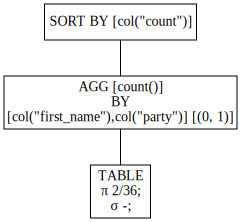

In [64]:
groupby_polars.show_graph(optimized=True)

In [55]:
groupby_polars_result = groupby_polars.collect()

In [57]:
groupby_polars_result

first_name,party,count
str,str,u32
"""John""","""Democrat""",526
"""John""","""Republican""",467
"""William""","""Democrat""",429
"""William""","""Republican""",394
"""James""","""Democrat""",339
